<a href="https://colab.research.google.com/github/shaarialwi/Data-analyst/blob/main/Build_a_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

inputs = np.array([[0, 0, 1],
                   [0, 1, 0],
                   [1, 0, 1],
                   [1, 1, 0],
                   ])

outputs = np.array([[0], [0], [1], [1]])

inputs [[0 0 1]
 [0 1 0]
 [1 0 1]
 [1 1 0]]
init [[0.5]
 [0.5]
 [1. ]
 [1. ]]
[[0.99547925]]  - Correct:  1
[[4.15133175e-05]]  - Correct:  0


Text(0, 0.5, 'Error')

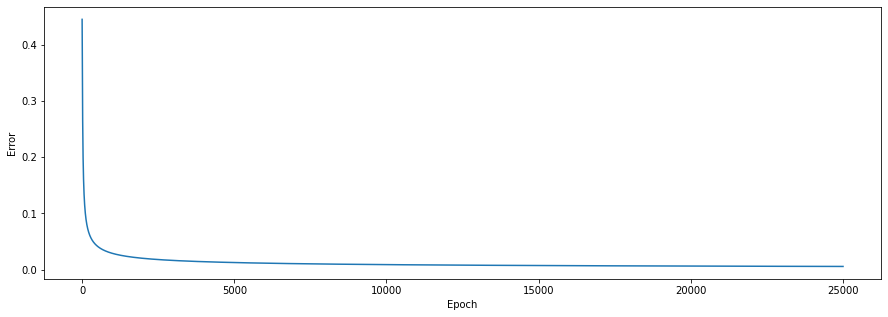

In [ ]:
class NeuralNetwork:
    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        
        # For us to keep track of our training progress
        self.error_history = []
        self.epoch_list = []

        print("inputs",self.inputs)
        print("init", np.dot(self.inputs, self.weights))

    def sigmoid(self, x, deriv=False):
      if deriv == True:
        return x * (1 - x)
      return 1 / (1 + np.exp(-x))

    def feed_forward(self):
      self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))
      # print("hidden",self.hidden)

    def backpropagation(self):
      self.error  = self.outputs - self.hidden
      delta = self.error * self.sigmoid(self.hidden, deriv=True)
      self.weights += np.dot(self.inputs.T, delta)
      # print("error", self.error)
      # print("weights",self.weights)

    def train(self, epochs=25000):
      for epoch in range(epochs):
          # flow forward and produce an output
          self.feed_forward()
          # go back though the network to make corrections based on the output
          self.backpropagation()    
          # keep track of the error history over each epoch
          self.error_history.append(np.average(np.abs(self.error)))
          self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Prediction: ', example[0][0])
print(NN.predict(example_2), ' - Prediction: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')